<h1>Final Analysis (Only MASS Subject #1) - FULL Mean QPS Parameters</h1>

In [44]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind

<h2>Importing The Dataset + Preprocessing</h2>

In [45]:
# Absolute filepath for the spindle dataset (for MASS #1)
filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\split_nobias_new.csv"

# Load the dataset as a pandas dataframe into workspace
df = pd.read_csv(filepath)

# View the first 5 rows of the dataframe:
df.head(5)

,Unnamed: 0,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
0,0,1.325652,9.716382,-26.859875,-2.833171,89.664042,-6.664296,2541.664544,20234.585253,268.922368,0.125610,0.013290,87.439008,14.336918,14.270475,0.463434,0.950960,0.340984,0
1,1,1.468553,-2.742548,-3.764752,21.437101,90.479274,7.496630,2874.578101,63598.537026,415.036250,0.045199,0.006526,95.480119,14.336918,14.400224,0.441560,0.934775,0.442130,0
2,2,0.525262,-1.139067,0.742051,-2.524328,87.725340,-15.234743,497.165205,79060.318611,333.878925,0.006288,0.004223,99.371157,15.360983,13.961922,9.107891,0.773619,0.153423,0
3,3,1.830789,-0.153870,-7.142737,-2.241972,74.768194,3.799330,2320.307933,112770.893715,132.430565,0.020575,0.001174,97.942459,12.288786,11.899728,3.165966,0.972698,0.133589,0
4,4,-2.333735,-23.980179,-35.672175,0.123019,95.521514,29.813112,770.847017,136731.374096,231.992380,0.005638,0.001697,99.436233,14.336918,15.202721,6.038979,0.876702,0.114632,0


In [46]:
len(df)

392418

<h3>Analysis With ONLY QPS Parameters</h3>

In [4]:
# Pull out all columns ONLY associated with the QPS parameters.
qps_params = ['a', 'b', 'c', 'd', 'e', 'f', 'label']
other_params = ['qps_energy', 'residual_energy', 'qser', 'rser', 
                'qps_freq_hz', 'qrfr', 'min_residual', 'max_residual', 
                'rms_residual', 'raw_qps_corrcoeff', 'label']

# Create a fresh dataframe for ONLY QPS parameters:
df_qps = df[qps_params]

df_qps.head(5)

,a,b,c,d,e,f,label
0,1.325652,9.716382,-26.859875,-2.833171,89.664042,-6.664296,0
1,1.468553,-2.742548,-3.764752,21.437101,90.479274,7.496630,0
2,0.525262,-1.139067,0.742051,-2.524328,87.725340,-15.234743,0
3,1.830789,-0.153870,-7.142737,-2.241972,74.768194,3.799330,0
4,-2.333735,-23.980179,-35.672175,0.123019,95.521514,29.813112,0


Generate a scatter plot to see the separation between the two classes with respect to the QPS parameters.

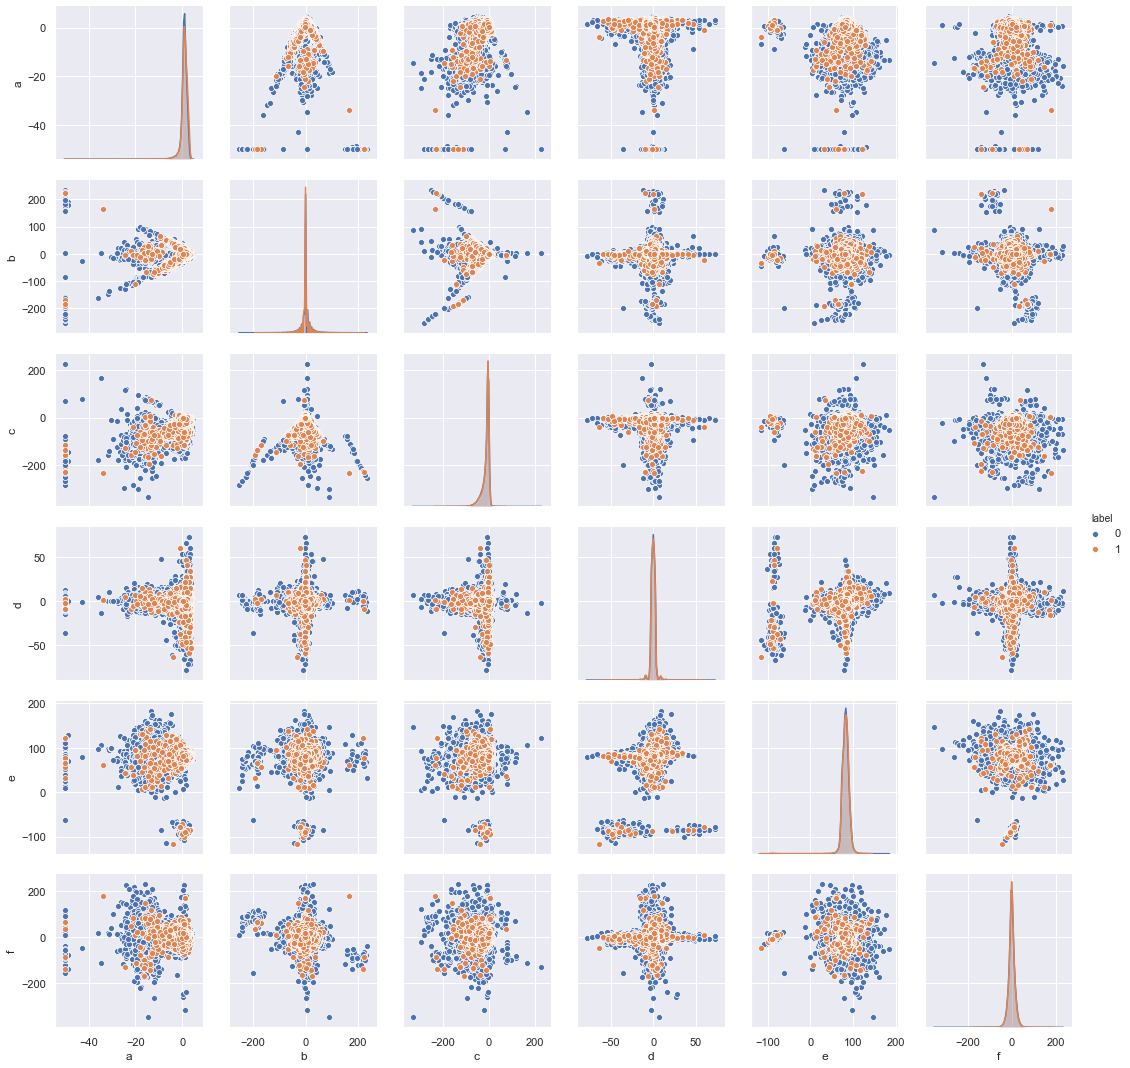

In [5]:
g = sns.pairplot(df[qps_params], vars=['a', 'b', 'c', 'd', 'e', 'f'], hue="label")
plt.savefig("qps_pairplot_scenario1_same_init.png", dpi=300, bbox_inches='tight')

In [8]:
# Statistics for spindles (label = 1)
df_qps[df_qps['label'] == 1].describe()

,a,b,c,d,e,f,label
count,13553.000000,13553.000000,13553.000000,13553.000000,13553.000000,13553.000000,13553.0
mean,0.884479,-0.777471,-12.638816,-0.180353,82.547403,0.638884,1.0
std,1.994547,9.870748,16.668374,3.559457,10.331972,14.770374,0.0
min,-50.000000,-193.355292,-235.544701,-63.403711,-116.217792,-171.536182,1.0
25%,0.426367,-2.552128,-16.655436,-1.550871,77.901103,-6.672818,1.0
50%,1.064400,-0.781977,-6.999836,-0.056534,82.820654,0.430078,1.0
75%,1.802660,0.888139,-2.775517,1.435155,87.572155,7.903467,1.0
max,3.812594,221.854742,74.012751,60.063003,141.699799,179.838044,1.0


In [9]:
# Statistics for NON-spindles (label = 0)
df_qps[df_qps['label'] == 0].describe()

,a,b,c,d,e,f,label
count,378865.000000,378865.000000,378865.000000,378865.000000,378865.000000,378865.000000,378865.0
mean,0.744481,-0.374120,-12.841678,-0.083208,82.674895,0.822705,0.0
std,1.834916,9.593549,16.532587,2.878480,8.425881,14.447230,0.0
min,-50.000000,-254.209797,-332.823535,-78.354859,-114.403414,-350.244245,0.0
25%,0.327027,-2.250374,-17.416801,-1.500887,77.816364,-6.787313,0.0
50%,0.914077,-0.663228,-7.098547,-0.040094,82.599410,0.565267,0.0
75%,1.557208,1.150838,-2.753277,1.429325,87.295837,8.371654,0.0
max,4.668411,234.376487,227.677742,72.564473,183.252704,230.873102,0.0


<h3>T-Test Between QPS Features</h3>

Using the spindle and non-spindle datasets, we can perform the t-test for each column of both of the datasets

In [30]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [31]:
list_params = ['a', 'b', 'c', 'd', 'e', 'f']
p = {}

for param in list_params:
    (_, p[param]) = ttest_ind(spindles[param], non_spindles[param])

# Print out the p-values for each parameter:
for param in list_params:
    print("Parameter {}: p = {}".format(param, p[param]))
    
# Extract features whose p-values fall below 1%
selected = []
for param in list_params:
    if (p[param] <= 0.01):
        selected.append(param)

print("Feature Selection From T-Test")
print(selected)

Parameter a: p = 2.4153972720723407e-07
Parameter b: p = 0.02569757378653097
Parameter c: p = 0.9165579029649741
Parameter d: p = 0.007131074330712801
Parameter e: p = 0.10734878353696532
Parameter f: p = 0.3635585434586027
Feature Selection From T-Test
['a', 'd']


All parameters have $p$ values that fall above the significance level of $\alpha = 1\%$. However, the best bet we have are parameters $a$ and $d$ that lie the nearest to our significance level. We try the neural network once more with only these two parameters as features. 

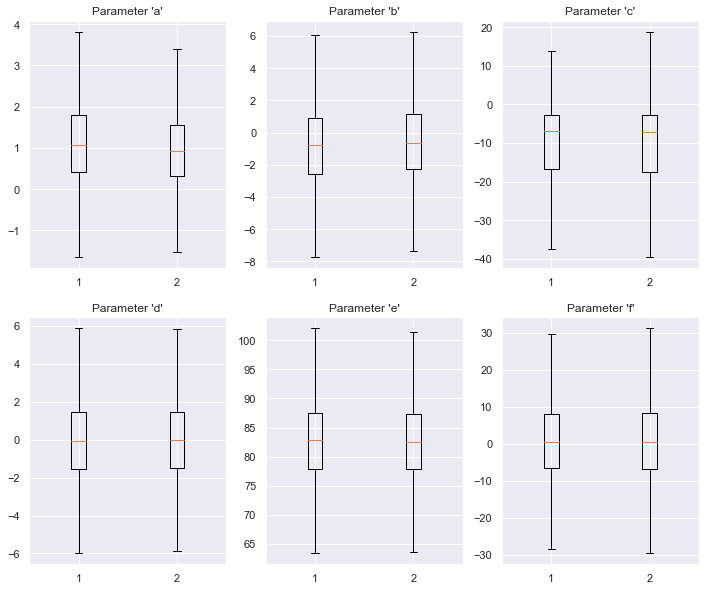

In [12]:
# Generate box plots for each column of the dataframe (other than the label):
fig, ax = plt.subplots(2,3,figsize=(12,10))
k = 0
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot([df_qps[df_qps['label'] == 1].iloc[:,k], df_qps[df_qps['label'] == 0].iloc[:,k]], showfliers=False)
        ax[i,j].set_title("Parameter '{}'".format(df_qps[df_qps['label'] == 1].columns[k]))
        ax[i,j].set_xticks([1,2], ["Spindles", "Non-Spindles"])
        k = k + 1
        
plt.savefig("scenario1_same_boxplot.png", dpi=300, bbox_inches='tight')

<h2>Preliminary Classification Using Neural Networks</h2>

In [13]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [14]:
# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

# Split into X and y (feature vectors and label vector):
X = final_df[['a', 'b', 'c', 'd', 'e', 'f']]
y = final_df['label']

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 17347 samples, validate on 4337 samples
Epoch 1/150
17347/17347 [==============================] - 1s 69us/step - loss: 0.6895 - acc: 0.5340 - val_loss: 0.6896 - val_acc: 0.5315
Epoch 2/150
17347/17347 [==============================] - 1s 41us/step - loss: 0.6854 - acc: 0.5433 - val_loss: 0.6889 - val_acc: 0.5442
Epoch 3/150
17347/17347 [==============================] - 1s 39us/step - loss: 0.6841 - acc: 0.5476 - val_loss: 0.6886 - val_acc: 0.5442
Epoch 4/150
17347/17347 [==============================] - 1s 37us/step - loss: 0.6831 - acc: 0.5502 - val_loss: 0.6882 - val_acc: 0.5365
Epoch 5/150
17347/17347 [==============================] - 1s 38us/step - loss: 0.6824 - acc: 0.5499 - val_loss: 0.6873 - val_acc: 0.5428
Epoch 6/150
17347/17347 [==============================] - 1s 38us/step - loss: 0.6821 - acc: 0.5494 - val_loss: 0.6872 - val_acc: 0.5421
Epo

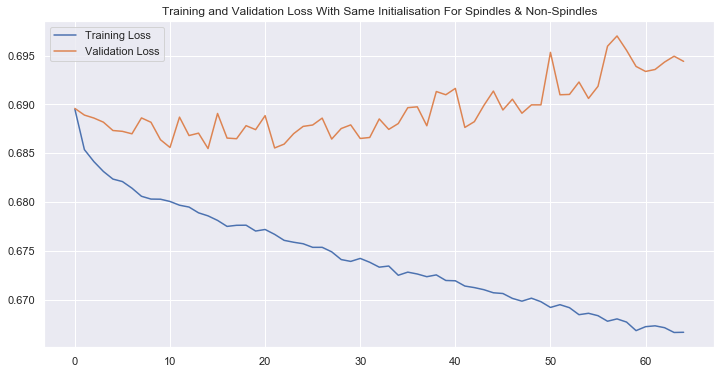

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the 'all_features' dataframe into training and test subsets. CV is performed using 'cross_val_score'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn = Sequential()
model_nn.add(Dense(38, activation='relu', input_dim=6))
model_nn.add(Dense(38, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=150, callbacks=[es])

# evaluate the model
_, train_acc = model_nn.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_nn.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training and Validation Loss With Same Initialisation For Spindles & Non-Spindles")
plt.savefig("scenario1_same_divergentloss.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(units=20, activation='relu', input_shape=(6,)))

    # Add fully connected layer with a ReLU activation function
    network.add(Dense(units=10, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

# Evaluate neural network using three-fold cross-validation
cv_scores = cross_val_score(neural_network, X_train, y_train, cv=5)
avg_cv_score = np.mean(cv_scores)
print(avg_cv_score)

0.5402140074710167


The final statistics show that:

- Final Training Accuracy = 74.3%
- Final Test Accuracy = 51.0%

The validation loss is extremely poor where:

- Final Training Loss = 42.5%
- Final Validation Loss = 112.4%

It appears that using all 6 QPS parameters as features into the neural network causes the validation loss to completely diverge from the training loss. We can make sense of this as being due to the <b>poor class</b> separation between the QPS parameters. Suppose we perform feature selection to remove features that may have been the cause of the poor validation loss.

Although not useful at this point, we should have an idea of how well this model performs using precision, recall and F1 scores as metrics for its performance ability.

In [17]:
# Evaluate the model using the test subset:
(model_nn_loss, model_nn_acc) = model_nn.evaluate(X_test, y_test)

# Print out the evaluative figures:
print("Loss Of Model 1: {}%".format(round(model_nn_loss,3) * 100))
print("Accuracy Of Model 1: {}%".format(round(model_nn_acc,3) * 100))

5422/5422 [==============================] - 0s 16us/step
Loss Of Model 1: 69.6%
Accuracy Of Model 1: 53.7%


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred = model_nn.predict_classes(X_test)

# Compute each metric:
acc = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

# Print out the metrics:
print("Accuracy = {}".format(acc))
print("Recall = {}".format(recall))
print("Precision = {}".format(precision))
print("F1 Score = {}".format(f1_score))

Accuracy = 0.5372556252305423
Recall = 0.5414947271893626
Precision = 0.4390334572490706
F1 Score = 0.4849106959556559


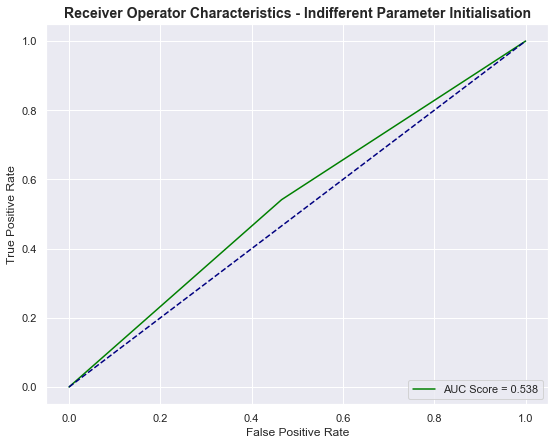

In [19]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr, tpr, thresholds) = roc_curve(y_pred, y_test)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score = auc(fpr, tpr)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics - Indifferent Parameter Initialisation", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr, tpr, color='green', label="AUC Score = {}".format(round(auc_score, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.savefig("scenario1_same_aucroc_allfeatures.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>AFTER Feature Selection</h3>

In [32]:
# New training and label set:
X_new = final_df[selected]
y_new = final_df['label']

Train on 17347 samples, validate on 4337 samples
Epoch 1/150
17347/17347 [==============================] - 1s 75us/step - loss: 0.6899 - acc: 0.5354 - val_loss: 0.6891 - val_acc: 0.5294
Epoch 2/150
17347/17347 [==============================] - 1s 40us/step - loss: 0.6879 - acc: 0.5413 - val_loss: 0.6878 - val_acc: 0.5379
Epoch 3/150
17347/17347 [==============================] - 1s 43us/step - loss: 0.6883 - acc: 0.5380 - val_loss: 0.6881 - val_acc: 0.5370
Epoch 4/150
17347/17347 [==============================] - 1s 40us/step - loss: 0.6881 - acc: 0.5383 - val_loss: 0.6889 - val_acc: 0.5324
Epoch 5/150
17347/17347 [==============================] - 1s 41us/step - loss: 0.6877 - acc: 0.5404 - val_loss: 0.6884 - val_acc: 0.5322
Epoch 6/150
17347/17347 [==============================] - 1s 39us/step - loss: 0.6872 - acc: 0.5402 - val_loss: 0.6893 - val_acc: 0.5303
Epoch 7/150
17347/17347 [==============================] - 1s 43us/step - loss: 0.6873 - acc: 0.5399 - val_loss: 0.6901 - v

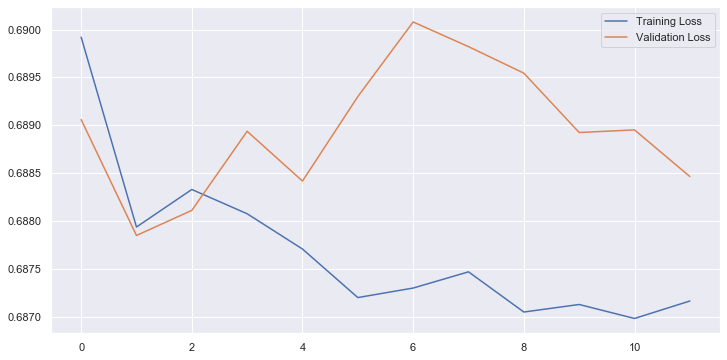

In [33]:
# Train-test splitting:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new)
X_train_new = std_scale.transform(X_train_new)
X_test_new = std_scale.transform(X_test_new)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn2 = Sequential()
model_nn2.add(Dense(38, activation='relu', input_dim=2))
model_nn2.add(Dense(38, activation='relu'))
model_nn2.add(Dense(1, activation='sigmoid'))

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model_nn2.fit(X_train_new, y_train_new, validation_split=0.2, epochs=150, callbacks=[es])

# evaluate the model
_, train_acc = model_nn2.evaluate(X_train_new, y_train_new, verbose=0)
_, test_acc = model_nn2.evaluate(X_test_new, y_test_new, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The final results after the feature selection show that parameters $a$ and $c$  allow the validation loss to approach a loss of 72% and stay within that loss as opposed to growing further like the case with using all features. The final accuracies achieved by the model were:

- Training: 56.8%
- Test: 54.3%

Where the accuracies of both the training and the test set are essentially the same which is much better than having the drastically higher training accuracy than the validation accuracy in the first case which suggests overfitting occurred.

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred2 = model_nn2.predict_classes(X_test_new)

# Compute each metric:
acc2 = accuracy_score(y_pred2, y_test_new)
recall2 = recall_score(y_pred2, y_test_new)
precision2 = precision_score(y_pred2, y_test_new)
f1_score2 = f1_score(y_pred2, y_test_new)

# Print out the metrics:
print("Accuracy = {}".format(acc2))
print("Recall = {}".format(recall2))
print("Precision = {}".format(precision2))
print("F1 Score = {}".format(f1_score2))

Accuracy = 0.5309848764293619
Recall = 0.559153998678123
Precision = 0.31080088170462894
F1 Score = 0.3995277449822905


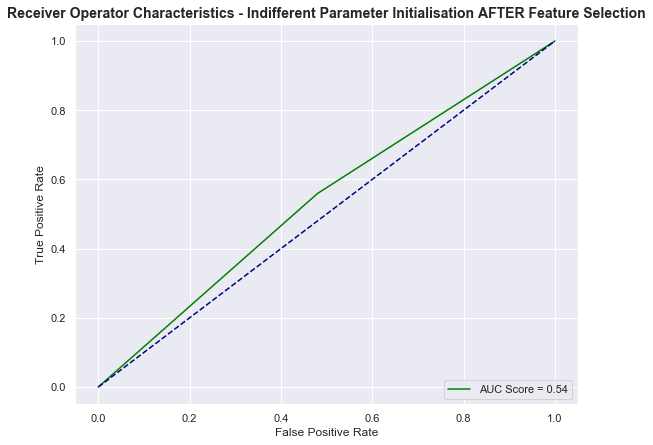

In [43]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr2, tpr2, thresholds2) = roc_curve(y_pred2, y_test_new)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score2 = auc(fpr2, tpr2)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics - Indifferent Parameter Initialisation AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr2, tpr2, color='green', label="AUC Score = {}".format(round(auc_score2, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.savefig("scenario1_same_aucroc_selectedfeatures.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Introducing Dropout In Between Layers</h3>

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 17347 samples, validate on 4337 samples
Epoch 1/250
17347/17347 [==============================] - 2s 91us/step - loss: 0.6929 - acc: 0.5243 - val_loss: 0.6897 - val_acc: 0.5329
Epoch 2/250
17347/17347 [==============================] - 1s 51us/step - loss: 0.6903 - acc: 0.5343 - val_loss: 0.6896 - val_acc: 0.5375
Epoch 3/250
17347/17347 [==============================] - 1s 47us/step - loss: 0.6892 - acc: 0.5361 - val_loss: 0.6899 - val_acc: 0.5310
Epoch 4/250
17347/17347 [==============================] - 1s 47us/step - loss: 0.6888 - acc: 0.5358 - val_loss: 0.6890 - val_acc: 0.5306
Epoch 5/250
17347/17347 [==============================] - 1s 49us/step - loss: 0.6882 - acc: 0.5353 - val_loss: 0.6891 - val_acc: 0.5296
Epoch 6/250
17347/17347 [==============================] - 1s 48us/step - loss: 0.6881 - acc: 0.5352 - val_loss: 0.6889 - val_acc: 0.5315
Epoch 7/

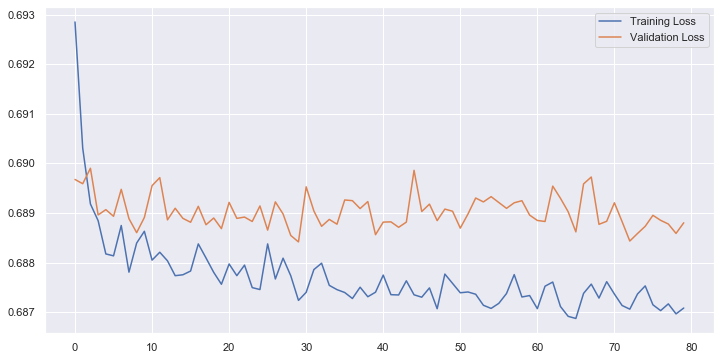

In [36]:
# Train-test splitting:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new2)
X_train_new2 = std_scale.transform(X_train_new2)
X_test_new2 = std_scale.transform(X_test_new2)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model_nn3 = Sequential()
model_nn3.add(Dense(38, activation='relu', input_dim=2))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(38, activation='relu'))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))

model_nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

history = model_nn3.fit(X_train_new2, y_train_new2, validation_split=0.2, epochs=150, callbacks=[es])

# evaluate the model
_, train_acc = model_nn3.evaluate(X_train_new2, y_train_new2, verbose=0)
_, test_acc = model_nn3.evaluate(X_test_new2, y_test_new2, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred3 = model_nn3.predict_classes(X_test_new2)

# Compute each metric:
acc3 = accuracy_score(y_pred3, y_test_new2)
recall3 = recall_score(y_pred3, y_test_new2)
precision3 = precision_score(y_pred3, y_test_new2)
f1_score3 = f1_score(y_pred3, y_test_new2)

# Print out the metrics:
print("Accuracy = {}".format(acc3))
print("Recall = {}".format(recall3))
print("Precision = {}".format(precision3))
print("F1 Score = {}".format(f1_score3))

Accuracy = 0.5413131685724825
Recall = 0.5806045340050378
Precision = 0.33612832664965364
F1 Score = 0.4257677210805818


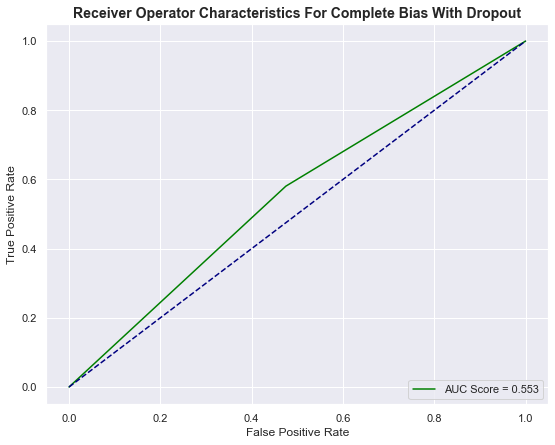

In [41]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr3, tpr3, thresholds3) = roc_curve(y_pred3, y_test_new2)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score3 = auc(fpr3, tpr3)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias With Dropout", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr3, tpr3, color='green', label="AUC Score = {}".format(round(auc_score3, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

The introduction of a 30% dropout probability means that 30% of the time, neurons in the hidden layer are deactivated or ignored during the training process. This means their contribution to the neurons in the subsequent layers are not applied and neither do they contribute to neurons during the back propagation stage. This minimises the chances of the neural network overfitting to the data and allows the model to generalise.

For this particular scenario, we can see the training and test accuracies have maintained their levels:

- Training Accuracy = 57.3%
- Testing Accuracy = 56.2%

While the validation loss has kept its percentage loss around 70%, the plot of validation loss against the iterations shows a notable increase compared to that with NO dropout regularisation introduced. The final loss percentages for the training and validation process are:

- Training Loss = 67.44%
- Validation Loss = 70.11%

<h2>Comments</h2>

Varying the hyperparameters for the neural network has shown that the neural network model can generalise to such a dataset that has a very poor class separation. Keep in mind that this analysis is for the case where the QPS parameter initialisation for the NLLS has been set their mean values known a posteriori. Perhaps these values allow the model to regress extremely well to both the spindles and non-spindles resulting in similar characteristics for their QPS parameters.

Another notebook will perform EXACTLY the same analysis but when the NLLS parameters are set to HALF of the mean values values known a posteriori. Perhaps by setting it to the midway point, the parameters will regress nicely to the spindles but poorly to the non-spindles (which is what we hope to see).